In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
cd C:\Users\sompurapooja32\ML (Machine Learning)\ML Projects

C:\Users\sompurapooja32\ML (Machine Learning)\ML Projects


#### Load the given dataset 

In [3]:
data = pd.read_csv("ML Linear Regression Home Price Prediction & Analysis Project  Resource16932049360.csv")

In [4]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


#### Print all the column names 

In [5]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### Describe the data

In [6]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

#### Drop address, date, postcode, YearBuilt, lattitude, longtitude columns

In [8]:
data.drop(['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'],axis=1,inplace=True)

In [9]:
data

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


In [10]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,10412.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,21650.000000


In [11]:
data.isnull().any()

Suburb           False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Distance          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
CouncilArea       True
Regionname        True
Propertycount     True
dtype: bool

#### Find the count of null value in each column

In [12]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [13]:
data[data["Price"].isnull() == True].head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
7,Abbotsford,4,h,NaN,SN,Nelson,2.5,3.0,2.0,2.0,400.0,220.0,Yarra City Council,Northern Metropolitan,4019.0
8,Abbotsford,2,h,NaN,S,Biggin,2.5,4.0,1.0,2.0,201.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
9,Abbotsford,2,h,NaN,S,Collins,2.5,3.0,2.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0


In [14]:
data[data["Bedroom2"].isnull() == True].head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
15,Abbotsford,3,h,1000000.0,S,Jellis,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
16,Abbotsford,2,t,745000.0,S,Jellis,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
19,Abbotsford,2,u,542000.0,S,Dingle,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
21,Abbotsford,2,u,760000.0,SP,Biggin,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
22,Abbotsford,1,u,481000.0,SP,Purplebricks,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0


#### Fill the null value of property count, distance, Bedroom2,Bathroom, Car with 0.

In [15]:
data["Distance"] = data["Distance"].fillna(0)

In [16]:
data[["Bathroom","Bedroom2","Car","Propertycount"]] = data[["Bathroom","Bedroom2","Car","Propertycount"]].fillna(0)

In [17]:
data.head(5)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [18]:
data[data["Car"].isnull() == True]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount


In [19]:
data[data["Propertycount"].isnull() == True]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount


#### Fill Null value of land size and building area columns with Mean

In [20]:
data["Landsize"] = data["Landsize"].fillna(data["Landsize"].mean())

In [21]:
data["BuildingArea"] = data["BuildingArea"].fillna(data["BuildingArea"].mean())

In [22]:
data

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.000000,160.2564,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.000000,160.2564,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.000000,79.0000,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.000000,160.2564,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.000000,150.0000,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.000000,160.2564,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.000000,104.0000,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.000000,120.0000,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,0.0,0.0,0.0,593.598993,160.2564,Maribyrnong City Council,Western Metropolitan,6543.0


In [23]:
data.dropna(inplace=True)

In [24]:
data.shape

(27244, 15)

#### Find the unique value in method column

In [25]:
data["Method"].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [26]:
data["CouncilArea"].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Frankston City Council',
       'Macedon Ranges Shire Council', 'Yarra Ranges Shire Council',
       'Wyndham City Council', 'Cardinia Shire Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [27]:
data["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

#### Create a dummy data for categorical data 

In [28]:
rep = {True:1,False:0}
data = pd.get_dummies(data,drop_first=True).replace(rep)

In [29]:
data

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.000000,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.000000,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.000000,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.0,2.0,1.0,94.000000,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.000000,142.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.000000,160.2564,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.000000,104.0000,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,2.0,1.0,2.0,220.000000,120.0000,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000.0,6.3,0.0,0.0,0.0,593.598993,160.2564,6543.0,0,...,0,0,0,0,0,0,0,0,1,0


### Visualizations

#### A.  Distribution of House Prices:

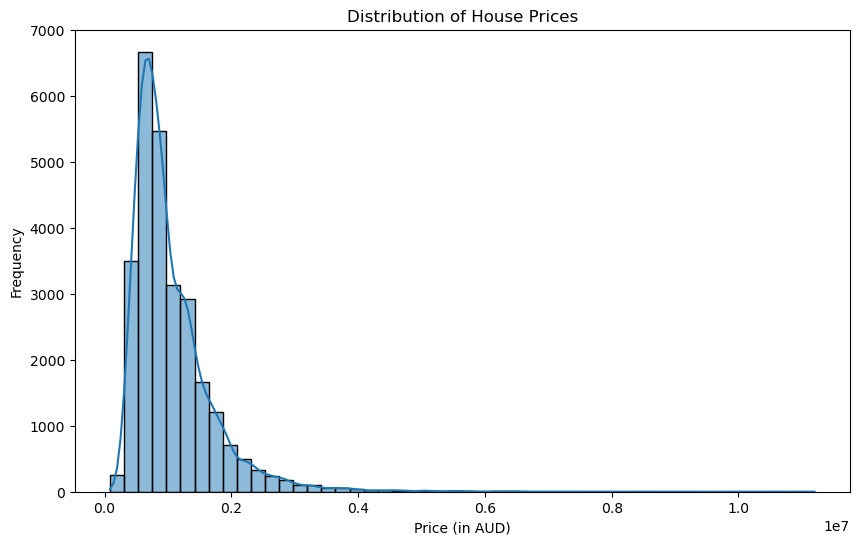

In [30]:
# Visualize distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in AUD)')
plt.ylabel('Frequency')
plt.show()

####  B. Price vs Number of Rooms

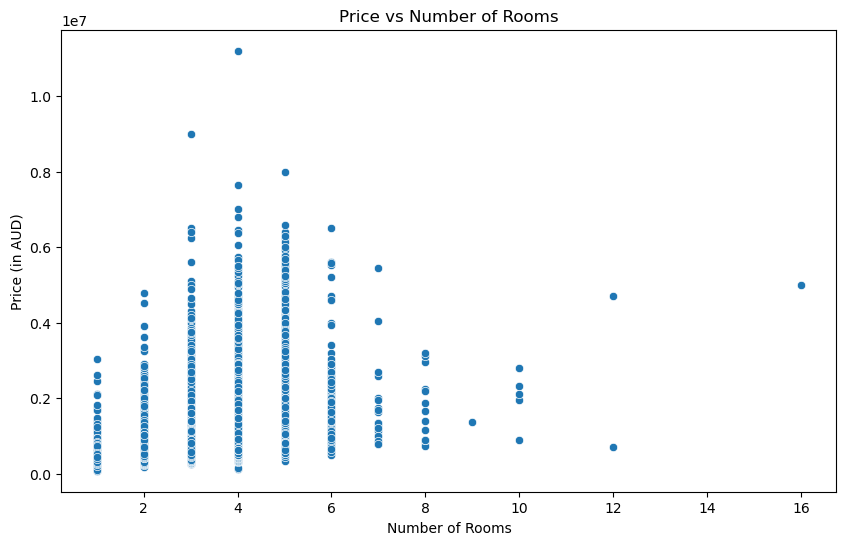

In [31]:
# Price vs Number of Rooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Rooms'], y=data['Price'])
plt.title('Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (in AUD)')
plt.show()

#### C. House Price Distribution by Regionname_South-Eastern Metropolitan

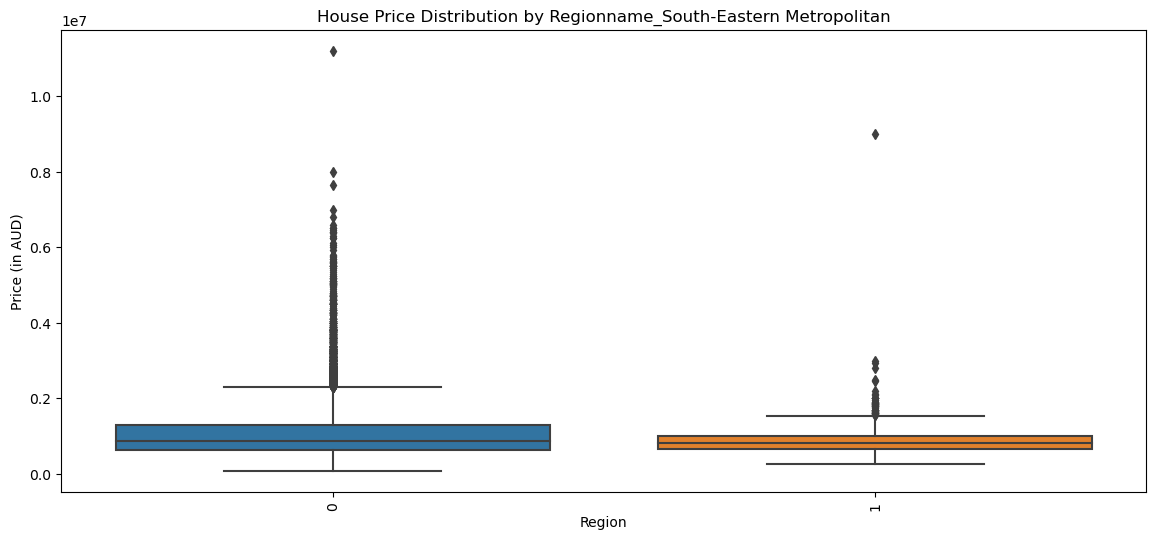

In [42]:
# House Price Distribution by Region
plt.figure(figsize=(14, 6))
sns.boxplot(x='Regionname_South-Eastern Metropolitan', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('House Price Distribution by Regionname_South-Eastern Metropolitan')
plt.xlabel('Region')
plt.ylabel('Price (in AUD)')
plt.show()

#### D. Price vs Distance from CBD (Central Business District)

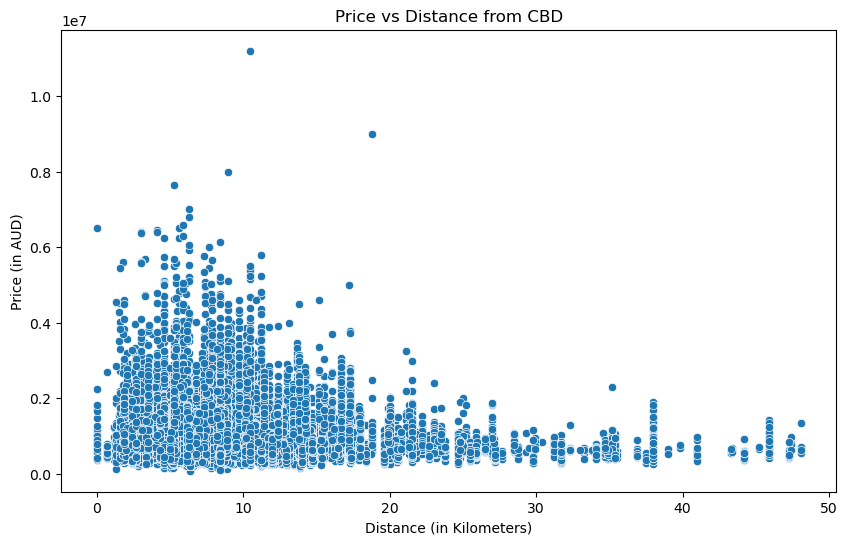

In [43]:
# Price vs Distance from CBD
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Distance'], y=data['Price'])
plt.title('Price vs Distance from CBD')
plt.xlabel('Distance (in Kilometers)')
plt.ylabel('Price (in AUD)')
plt.show()

#### E. Price vs Land Size & Building Area

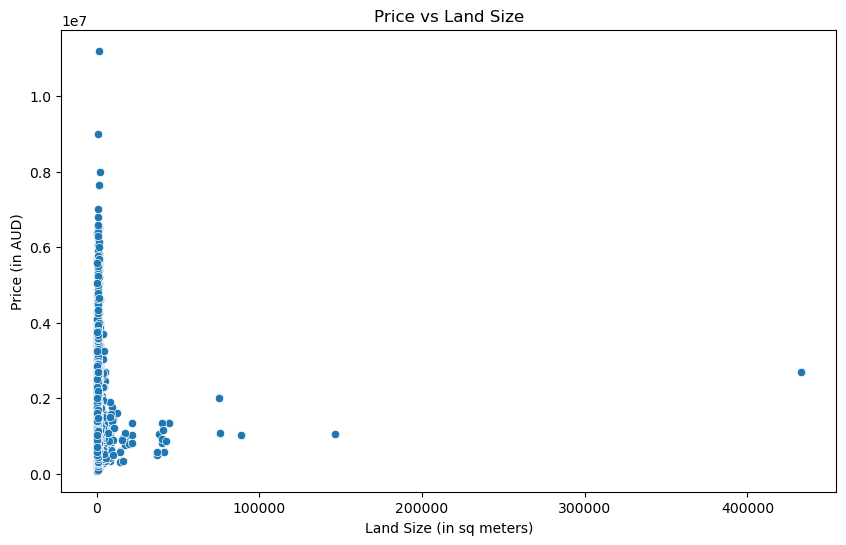

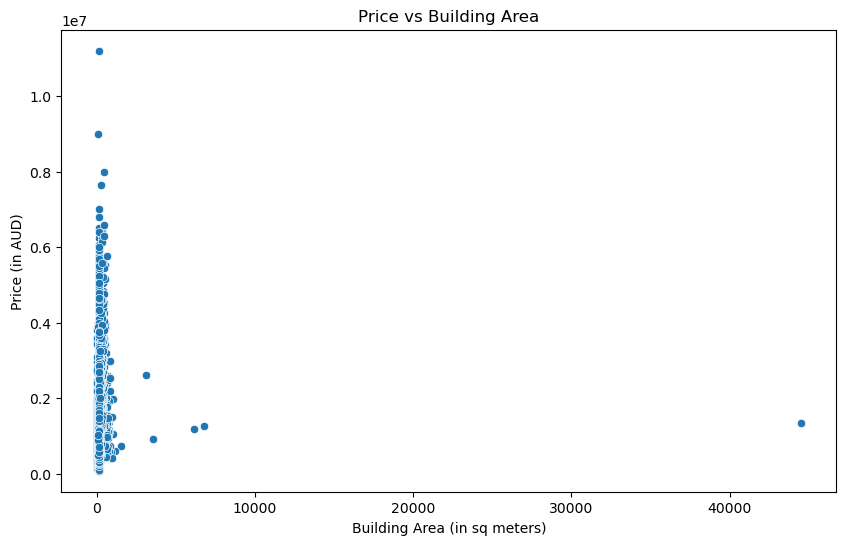

In [44]:
# Price vs Land Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Landsize'], y=data['Price'])
plt.title('Price vs Land Size')
plt.xlabel('Land Size (in sq meters)')
plt.ylabel('Price (in AUD)')
plt.show()

# Price vs Building Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['BuildingArea'], y=data['Price'])
plt.title('Price vs Building Area')
plt.xlabel('Building Area (in sq meters)')
plt.ylabel('Price (in AUD)')
plt.show()

#### Create the target data and feature data where target data is price.

In [45]:
# Working with model
x = data.drop("Price",axis=1)

In [46]:
x.shape

(27244, 744)

In [47]:
y = data["Price"]

In [48]:
y.shape

(27244,)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=50)

In [50]:
x_train.shape

(21795, 744)

In [51]:
x_test.shape

(5449, 744)

In [52]:
y_train.shape

(21795,)

In [53]:
y_test.shape

(5449,)

#### Create a linear regression model for Target and feature data 

In [54]:
model = LinearRegression()

In [55]:
model.fit(x_train,y_train)

LinearRegression()

In [56]:
pred_y = model.predict(x_train)

In [57]:
r2_score(y_train,pred_y)

0.678038714057

#### Check if the model is overfitting or underfitting or it is accurate 

In [58]:
model.score(x_train,y_train)

0.678038714057

In [59]:
model.score(x_test,y_test)

-21375867551.513676

#### model has an overfiting to solve this we can use Regularization methods like Lasso & Ridge

In [60]:
model1=[Lasso,Ridge]
for i in model1:
    model_new = i()
    model_new.fit(x_train,y_train)
    print(model_new.score(x_train,y_train),'/t',model_new.score(x_test,y_test))
    pred_y = model_new.predict(x_train)

C:\Users\sompurapooja32\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+15, tolerance: 8.998e+11
  model = cd_fast.enet_coordinate_descent(


0.6780055661649309 /t 0.6812838353606007
0.677363424158516 /t 0.682429385730335


#### Extract slope and intercept value from the model.

In [61]:
model_new.intercept_

718963.8044667921

In [62]:
model_new.coef_

array([ 2.71166751e+05, -3.85548534e+04, -8.79662799e+04,  1.27345331e+05,
        4.14377020e+04,  2.47622154e+00,  3.50251177e+01,  1.41655626e+00,
        2.27141728e+05, -5.68622114e+04, -2.34911306e+04,  2.94345729e+05,
        1.19296316e+05,  2.56164883e+05,  1.36095139e+05, -9.67788038e+04,
       -1.61193064e+05, -5.79319116e+04,  1.10599964e+05, -8.33089113e+04,
       -4.44478771e+04, -3.72309710e+04,  8.73960266e+04, -1.99716877e+05,
       -8.27828317e+04, -2.69567326e+05,  6.68431959e+04, -1.64452362e+05,
        1.65783801e+05,  2.23731524e+04,  9.23701716e+04,  1.57426023e+04,
        1.99455537e+05,  3.75408768e+03,  1.26900019e+05, -3.06494169e+05,
        5.54106697e+04, -5.12534506e+04,  8.18415707e+03,  2.25231393e+05,
        1.63901723e+05, -1.40269965e+05, -3.60844131e+04,  2.70425341e+05,
        1.15677810e+05,  0.00000000e+00,  2.05610910e+05, -1.27372221e+05,
       -9.15706992e+04,  4.03391540e+05, -8.93453837e+04, -5.51143950e+03,
       -4.45448330e+04,  

#### Display Mean Squared Error 

In [63]:
mean_squared_error(y_train,pred_y)

133198085761.73663

#### Display Mean Absolute Error 

In [64]:
mean_absolute_error(y_train,pred_y)

229408.57506092612

#### Display Root mean Squared error 

In [65]:
math.sqrt(mean_squared_error(y_train,pred_y))

364963.1293182047

#### Display R2 score 

In [66]:
r2_score(y_train,pred_y)

0.677363424158516

In [67]:
data.to_csv("Ml Home Prediction.csv") # To save clean data.

In [68]:
pd.read_csv("Ml Home Prediction.csv")

,Unnamed: 0,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1,2,1480000.0,2.5,2.0,1.0,1.0,202.000000,160.2564,4019.0,...,0,1,0,0,1,0,0,0,0,0
1,2,2,1035000.0,2.5,2.0,1.0,0.0,156.000000,79.0000,4019.0,...,0,1,0,0,1,0,0,0,0,0
2,4,3,1465000.0,2.5,3.0,2.0,0.0,134.000000,150.0000,4019.0,...,0,1,0,0,1,0,0,0,0,0
3,5,3,850000.0,2.5,3.0,2.0,1.0,94.000000,160.2564,4019.0,...,0,1,0,0,1,0,0,0,0,0
4,6,4,1600000.0,2.5,3.0,1.0,2.0,120.000000,142.0000,4019.0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,34852,4,1480000.0,6.3,4.0,1.0,3.0,593.000000,160.2564,6543.0,...,0,0,0,0,0,0,0,0,1,0
27240,34853,2,888000.0,6.3,2.0,2.0,1.0,98.000000,104.0000,6543.0,...,0,0,0,0,0,0,0,0,1,0
27241,34854,2,705000.0,6.3,2.0,1.0,2.0,220.000000,120.0000,6543.0,...,0,0,0,0,0,0,0,0,1,0
27242,34855,3,1140000.0,6.3,0.0,0.0,0.0,593.598993,160.2564,6543.0,...,0,0,0,0,0,0,0,0,1,0
